# Sentiment Analysis for Product Reviews

## Introduction

This project focuses on conducting sentiment analysis on a collection of product reviews from an e-commerce platform. The goal is to classify the sentiment of each review as positive, negative, or neutral based on the text of the review and its associated rating.

The project leverages **Natural Language Processing (NLP)** techniques and **Machine Learning (ML)** algorithms to analyze and categorize sentiments. This provides valuable insights into customer feedback, which can be instrumental in improving product quality and customer service.

In the subsequent sections, we will delve into the specifics of the code and the methodologies employed.


Begin with;

1. **Importing necessary libraries**: These libraries provide the necessary functions and methods to perform data analysis, natural language processing, machine learning, and visualization.

    - `pandas` and `numpy`: Used for data manipulation and analysis.
    - `re`: Provides regular expression matching operations.
    - `matplotlib.pyplot` and `seaborn`: Used for creating static, animated, and interactive visualizations.
    - `spacy`: A library for advanced Natural Language Processing.
    - `wordcloud`: Used to visualize word frequency.
    - `sklearn`: Provides machine learning algorithms, data preprocessing methods, and metrics for model evaluation.
    - `warnings`: Used to ignore any warning messages for cleaner output.

2. **Setting the plot style**: The line `plt.style.use('ggplot')` sets the style of the plots to 'ggplot', which is a popular style that emulates the aesthetics of ggplot (a plotting system for R).


In [1]:

# Import necessary libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Set the style for plots
plt.style.use('ggplot')


## Data Preparation

1. **Setting the data path**: The variable `data_path` is assigned the path to the text file containing the Amazon product reviews. This path is specific to your local machine or server where the file is stored.

2. **Loading the data**: The `pandas` function `read_csv()` is used to read the text file and load it into a DataFrame `amz_df`. A DataFrame is a two-dimensional labeled data structure with columns of different types. It is similar to a spreadsheet or SQL table, or a dictionary of Series objects.

3. **Displaying the data**: The `display()` function is used to display the first 5 rows of the DataFrame. This is useful for quickly testing if your object has the right type of data in it.


In [2]:
# Set the data path
data_path = "C:\\ANITA CHEBUKATI\\FLIT\\Sentiment Analysis for Product Review\\Amazon Product Review.txt"

# Load the data
amz_df = pd.read_csv(data_path)

display(amz_df.head(5))

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,sentiment
0,US,11555559,R1QXC7AHHJBQ3O,B00IKPX4GY,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Five Stars,Great love it,2015-08-31,1
1,US,31469372,R175VSRV6ZETOP,B00IKPYKWG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,3,0,0,N,N,Lots of ads Slow processing speed Occasionally...,Lots of ads<br />Slow processing speed<br />Oc...,2015-08-31,0
2,US,26843895,R2HRFF78MWGY19,B00IKPW0UA,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Well thought out device,Excellent unit. The versatility of this table...,2015-08-31,1
3,US,19844868,R8Q39WPKYVSTX,B00LCHSHMS,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,4,0,0,N,N,Not all apps/games we were looking forward to ...,I bought this on Amazon Prime so I ended up bu...,2015-08-31,1
4,US,1189852,R3RL4C8YP2ZCJL,B00IKPZ5V6,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Five Stars,All Amazon products continue to meet my expect...,2015-08-31,1


In [3]:
# Check the shape of the DataFrame
print(amz_df.shape)

(30846, 16)


In [4]:
# Get info about the DataFrame
print(amz_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30846 entries, 0 to 30845
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   marketplace        30846 non-null  object
 1   customer_id        30846 non-null  int64 
 2   review_id          30846 non-null  object
 3   product_id         30846 non-null  object
 4   product_parent     30846 non-null  int64 
 5   product_title      30846 non-null  object
 6   product_category   30846 non-null  object
 7   star_rating        30846 non-null  int64 
 8   helpful_votes      30846 non-null  int64 
 9   total_votes        30846 non-null  int64 
 10  vine               30846 non-null  object
 11  verified_purchase  30846 non-null  object
 12  review_headline    30844 non-null  object
 13  review_body        30842 non-null  object
 14  review_date        30846 non-null  object
 15  sentiment          30846 non-null  int64 
dtypes: int64(6), object(10)
memory usage: 3.

## Exploratory Data Analysis (EDA)

1. **Calculating the percentage of each rating**: The `value_counts()` function is used to get the count of each unique value in the 'star_rating' column of the DataFrame `amz_df`. This count is then divided by the total number of rows in the DataFrame (obtained using `len(amz_df)`) and multiplied by 100 to get the percentage of each rating. The result is stored in the variable `rating_pct`.

2. **Printing the percentage of each rating**: The `print()` function is used to display the percentage of each rating. The output shows that the majority of the reviews have a 5-star rating (approximately 64.9%), followed by 4-star ratings (approximately 18.6%), and so on.

3. **Plotting the percentage of each rating**: The `plot.bar()` function is used to create a bar plot of the percentages of each rating. The `plt.show()` function is then used to display the plot. This visual representation helps in better understanding the distribution of ratings in the reviews.


star_rating
5    64.899825
4    18.634507
3     7.184076
1     5.537185
2     3.744408
Name: count, dtype: float64


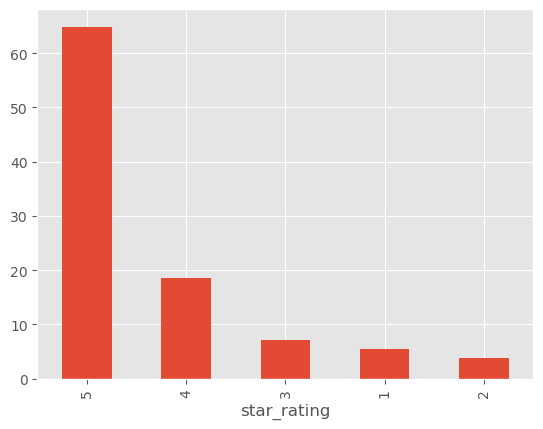

In [5]:
# Calculate the percentage of each rating
rating_pct = amz_df['star_rating'].value_counts() / len(amz_df) * 100
print(rating_pct)

# Plot the percentage of each rating
rating_pct.plot.bar()
plt.show()

## Data Cleaning

Defining a function `clean_text()` to clean the review text and then applying this function to the 'review_body' column of the DataFrame `amz_df`. Here's what each line is doing:

1. `Review = str(Review).lower()`: This line is converting the review text to lowercase. This is done because in text analysis, words like 'The' and 'the' are considered different due to the case difference. Converting everything to lowercase ensures that words are not treated as different just because of case differences.

2. `Review = re.sub('\[.*?\]', '', Review)`: This line is removing anything enclosed in square brackets.

3. `Review = re.sub('https?://\S+|www\.\S+', '', Review)`: This line is removing any URLs from the review text.

4. `Review = re.sub('<.*?>+', '', Review)`: This line is removing anything enclosed in angle brackets. This is typically used to remove HTML tags.

5. `Review = re.sub(r'[^a-z0-9\s]', '', Review)`: This line is removing any punctuation from the review text.

6. `Review = re.sub('\n', '', Review)`: This line is removing newline characters from the review text.

7. `Review = re.sub('\w*\d\w*', '', Review)`: This line is removing any words containing numbers.

8. `amz_df['review_body'] = amz_df['review_body'].apply(clean_text)`: This line is applying the `clean_text()` function to the 'review_body' column of the DataFrame `amz_df`. The cleaned text replaces the original text in the 'review_body' column.


In [7]:
# Clean the text
def clean_text(Review):
    Review = str(Review).lower()  # convert to lowercase
    Review = re.sub('\[.*?\]', '', Review)
    Review = re.sub('https?://\S+|www\.\S+', '', Review)  # Remove URLs
    Review = re.sub('<.*?>+', '', Review)
    Review = re.sub(r'[^a-z0-9\s]', '', Review)  # Remove punctuation
    Review = re.sub('\n', '', Review)
    Review = re.sub('\w*\d\w*', '', Review)
    return Review

amz_df['review_body'] = amz_df['review_body'].apply(clean_text)

Next display the most frequent words

1. **Joining all reviews into one text**: The line `txt = ' '.join(review for review in amz_df.review_body)` is joining all the reviews in the 'review_body' column of the DataFrame `amz_df` into one single string `txt`. This is done by iterating over each review in 'review_body' and joining them with a space in between.

2. **Generating a word cloud**: The `WordCloud()` function from the `wordcloud` library is used to generate a word cloud. The parameters set the background color to white, the maximum font size to 100, the maximum number of words to 100, and the dimensions of the word cloud to 800x500. The `generate(txt)` function is then called on the word cloud object to generate the word cloud from the text `txt`.

3. **Displaying the word cloud**: The `imshow()` function from the `matplotlib.pyplot` library is used to display the word cloud. The parameter 'bilinear' is passed to the `interpolation` argument to make the displayed image appear more smooth. The `axis('off')` function is used to turn off the axis. Finally, the `show()` function is used to display the plot.


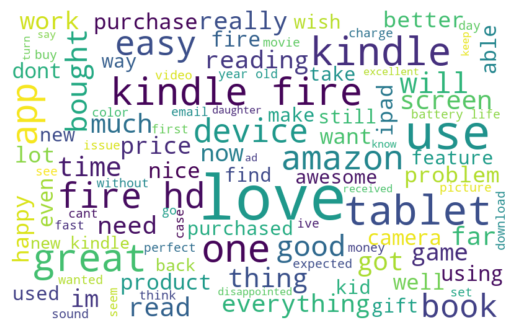

In [8]:
# Join all reviews into one text
txt = ' '.join(review for review in amz_df.review_body)

# Generate a word cloud
wordcloud = WordCloud(
    background_color='white',
    max_font_size=100,
    max_words=100,
    width=800,
    height=500
).generate(txt)

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [9]:
display(amz_df['review_body'][5])

'good product i like it '

## Natural language Processing- SpaCy

1. **Loading the English model for spaCy**: The line `nlp = spacy.load('en_core_web_sm')` is loading the English model for spaCy. This model includes several features, such as part-of-speech tagging, dependency parsing, and named entity recognition.

2. **Applying the spaCy pipeline to your reviews**: The line `amz_df['reviews_text'] = amz_df['review_body'].apply(lambda row: ' '.join([token.lemma_ for token in nlp(row) if not token.is_stop]))` is applying the spaCy pipeline to each review in the 'review_body' column of the DataFrame `amz_df`. This pipeline includes several steps, such as tokenization, lemmatization, and stop word removal. Here's what each part of this line is doing:

    - `lambda row: ' '.join([token.lemma_ for token in nlp(row) if not token.is_stop])`: This is a lambda function that takes a review as input and returns a string. The string is created by joining the lemmas of the tokens in the review. Only tokens that are not stop words are included. Stop words are common words like 'the', 'is', and 'and' that do not carry much meaning and are often removed in natural language processing.
    
    - `amz_df['review_body'].apply(...)`: This part is applying the lambda function to each review in the 'review_body' column of the DataFrame `amz_df`. The result is a new series where each review has been processed by the spaCy pipeline.

    - `amz_df['reviews_text'] = ...`: This part is assigning the new series to a new column 'reviews_text' in the DataFrame `amz_df`.


In [10]:
# Load the English model for spaCy
nlp = spacy.load('en_core_web_sm')

# Apply the spaCy pipeline to your reviews
amz_df['reviews_text'] = amz_df['review_body'].apply(lambda row: ' '.join([token.lemma_ for token in nlp(row)
                                                                           if not token.is_stop]))


In [11]:
display(amz_df.head(5))

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,sentiment,reviews_text
0,US,11555559,R1QXC7AHHJBQ3O,B00IKPX4GY,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Five Stars,great love it,2015-08-31,1,great love
1,US,31469372,R175VSRV6ZETOP,B00IKPYKWG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,3,0,0,N,N,Lots of ads Slow processing speed Occasionally...,lots of adsslow processing speedoccasionally s...,2015-08-31,0,lot adsslow processing speedoccasionally shut ...
2,US,26843895,R2HRFF78MWGY19,B00IKPW0UA,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Well thought out device,excellent unit the versatility of this tablet...,2015-08-31,1,excellent unit versatility tablet competitiv...
3,US,19844868,R8Q39WPKYVSTX,B00LCHSHMS,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,4,0,0,N,N,Not all apps/games we were looking forward to ...,i bought this on amazon prime so i ended up bu...,2015-08-31,1,buy amazon prime end buy camera okay love...
4,US,1189852,R3RL4C8YP2ZCJL,B00IKPZ5V6,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Five Stars,all amazon products continue to meet my expect...,2015-08-31,1,amazon product continue meet expectation


sentiment
1    25767
0     5079
Name: count, dtype: int64


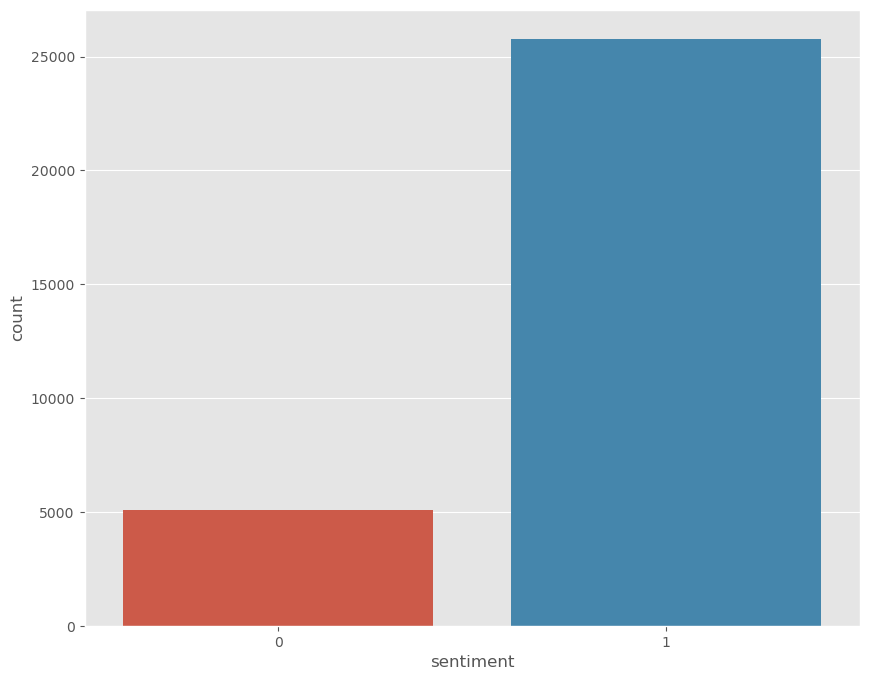

In [12]:
# Count the number of each sentiment
sentiment = amz_df['sentiment'].value_counts()
print(sentiment)

# Plot the number of each sentiment
plt.figure(figsize=(10, 8))
sns.countplot(data=amz_df, x='sentiment')
plt.show()

## Model Building

1. **Splitting the data**: The `train_test_split()` function from the `sklearn.model_selection` library is used to split the dataset into training and testing sets. The function is called with the following arguments:

    - `amz_df['reviews_text']`: This is the feature data, which consists of the cleaned and processed reviews.
    
    - `amz_df['sentiment']`: This is the target data, which consists of the sentiment labels for the reviews.
    
    - `random_state=42`: This is used for reproducibility. This means that the random numbers generated will be the same every time this line of code is run.
    
    - `test_size=0.20`: This means that 20% of the data will be used for the testing set, and the remaining 80% will be used for the training set.
    
   The function returns four outputs, which are assigned to `X_train`, `X_test`, `y_train`, `y_test`. These represent the features for the training data, the features for the testing data, the target for the training data, and the target for the testing data, respectively.

2. **Printing the shapes of the train and test sets**: The `print()` function is used to display the shapes of `X_train`, `X_test`, and `y_train`. The shape of a DataFrame or Series is a tuple representing the dimensionality. The shape will give the number of rows in each set, which can be useful to verify that the data has been split correctly.


In [14]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(amz_df['reviews_text'], amz_df['sentiment'], random_state=42, test_size=0.20)

# Print the shapes of the train and test sets
print(X_train.shape, X_test.shape, y_train.shape)


(24676,) (6170,) (24676,)


## Data preprocessing, Model training, and Model evaluation

1. **Defining the resampling method**: The line `method = SMOTE(random_state=42)` is defining the resampling method to be used. SMOTE (Synthetic Minority Over-sampling Technique) is an oversampling technique where the synthetic samples are generated for the minority class. This is used to handle imbalanced datasets.

2. **Vectorizing the text data**: The `TfidfVectorizer()` from `sklearn.feature_extraction.text` is used to convert the text data into a matrix of TF-IDF features.

3. **Creating the resampled feature set**: The `fit_resample()` function is called on the `method` object to resample the original dataset. It takes the feature matrix `X` and the target series `amz_df['sentiment']` as input and returns the resampled feature matrix and target series.

4. **Splitting the resampled data into training and test sets**: The `train_test_split()` function is used again to split the resampled data into training and test sets.

5. **Defining and training the model**: A `RandomForestClassifier` is defined and trained on the training data. The `fit()` function is called on the classifier object to train the model.

6. **Making predictions**: The `predict()` function is called on the trained model to make predictions on the test data.

7. **Printing the training accuracy, test accuracy, AUC-ROC, classification report, and confusion matrix**: The `score()` function is called on the trained model to compute the accuracy of the model on the training and test data. The `roc_auc_score()` function is used to compute the Area Under the Receiver Operating Characteristic Curve (AUC-ROC). The `classification_report()` function is used to generate a report of the main classification metrics. The `confusion_matrix()` function is used to compute the confusion matrix to evaluate the accuracy of the classification.


In [15]:

# Define the resampling method
method = SMOTE(random_state=42)

# Vectorize your text data
vectorizer = TfidfVectorizer(stop_words="english")
X = vectorizer.fit_transform(amz_df['reviews_text'])

# Create the resampled feature set
X_resampled, y_resampled = method.fit_resample(X, amz_df['sentiment'])

# Now you can split your resampled data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, random_state=42, test_size=0.20)

# Then you can continue with your model as before
clf = RandomForestClassifier(n_estimators=100, random_state=42)

fit_model = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('Training accuracy:', fit_model.score(X_train, y_train))
print('Test accuracy:', fit_model.score(X_test, y_test))
print('AUC-ROC:', roc_auc_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Training accuracy: 0.9944211317825696
Test accuracy: 0.9309207334820996
AUC-ROC: 0.9307363055607643
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      5180
           1       0.96      0.89      0.93      5127

    accuracy                           0.93     10307
   macro avg       0.93      0.93      0.93     10307
weighted avg       0.93      0.93      0.93     10307

[[5007  173]
 [ 539 4588]]


## Model Interpretation

1. **Training accuracy**: The training accuracy is approximately 99.44%, which means that the model correctly classified about 99.44% of the training data.

2. **Test accuracy**: The test accuracy is approximately 93.09%, which means that the model correctly classified about 93.09% of the test data.

3. **AUC-ROC**: The Area Under the Receiver Operating Characteristic Curve (AUC-ROC) is approximately 0.93. This score is a measure of the model's ability to distinguish between the classes. A score of 1 represents a perfect classifier, so 0.93 is a very good score.

4. **Classification report**: The classification report provides detailed performance metrics for each class:

    - **Precision**: Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. High precision relates to the low false positive rate. For both classes, the precision is quite high (0.90 for class 0 and 0.96 for class 1), indicating that the model has a low rate of false positives.
    
    - **Recall**: Recall (Sensitivity) is the ratio of correctly predicted positive observations to the all observations in actual class. The recall is also quite high for both classes (0.97 for class 0 and 0.89 for class 1), indicating that the model is able to detect the positive instances at a high rate.
    
    - **F1-score**: The F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. The F1-score is quite high for both classes (0.93), indicating that the model is robust.

5. **Confusion matrix**: The confusion matrix provides a visual representation of the model's performance. It shows the true positives, true negatives, false positives, and false negatives.


|                    | Predicted Positive | Predicted Negative |
|--------------------|-------------------:|-------------------:|
| **Actual Positive**| 5007               |                173 |
| **Actual Negative**| 539                |               4588 |


1. **True Positives (TP)**: model correctly predicted 5007 positive reviews. These are cases where both the actual class was positive and the model also predicted the positive class.

2. **True Negatives (TN)**: model correctly predicted 4588 negative reviews. These are cases where both the actual class was negative and the model also predicted the negative class.

3. **False Positives (FP)**: model incorrectly predicted 539 reviews as positive. These are cases where the actual class was negative, but the model predicted them as positive. This type of error is also known as a "Type I error" or "false alarm".

4. **False Negatives (FN)**: model incorrectly predicted 173 reviews as negative. These are cases where the actual class was positive, but the model predicted them as negative. This type of error is also known as a "Type II error" or "miss".

From these results, we can see that your model has a relatively low number of false positives and false negatives, which is a good sign.  

## Insights, Recommendations

**Insights**:

1. **High Accuracy**: The model has a high training accuracy of approximately 99.44% and a test accuracy of approximately 93.09%. This indicates that the model is performing well in classifying reviews as positive or negative.

2. **Good Performance Metrics**: The model has a high AUC-ROC score of approximately 0.93, indicating a good balance between sensitivity and specificity. The precision, recall, and F1-score are also high for both classes, indicating that the model is performing well on both positive and negative reviews.

3. **Confusion Matrix**: The confusion matrix shows that the model has more true positives and true negatives than false positives and false negatives. This indicates that the model is correctly classifying most of the reviews.

**Recommendations**:

1. **Monitor Overfitting**: There is a noticeable difference between the training and test accuracy, which could be a sign of overfitting. It's recommended to monitor the model's performance over time to ensure it continues to generalize well to new data.

2. **Consider Business Context**: Depending on the specific requirements of your task, you might want to aim for reducing either false positives or false negatives. For instance, if it's more costly to misclassify a negative review as positive (false positive), you should aim for reducing false positives even if it means increasing false negatives, and vice versa.

3. **Iterative Improvement**: Building a machine learning model is an iterative process. With each iteration, you'll learn more about your data and how to best model it. Therefore, it's recommended to continuously improve the model based on new data and feedback.

4. **Leverage Insights**: The insights gained from the model can be used to improve products and services. For example, by understanding what aspects customers are unhappy about (from negative reviews), efforts can be made to improve those areas.
